<a href="https://colab.research.google.com/github/joew2k/finance_data/blob/main/TimeSeriesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import kurtosis, skewnorm, norm
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
from google.colab import drive
import os
import datetime
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
plt.rcParams["figure.figsize"] = (16, 9)  # Figure size and width
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

In [ ]:
!pip install arch
from arch.unitroot import ADF, KPSS

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 916.4/916.4 kB 6.6 MB/s eta 0:00:00


# **Joining time series with different frequencies**

## Definition

Time series with different frequencies are time series that have different sampling intervals. For example, one time series may be sampled hourly, while another time series may be sampled daily. This can cause problems when trying to join the two-time series, as the data points will not be aligned

## Description
When joining time series with different frequencies, there are two main approaches:
- Upsampling: This involves increasing the frequency of the lower-frequency time series by adding more data points. This can be done by interpolation, which means estimating the values of missing data points.
- Downsampling: This involves decreasing the frequency of the higher-frequency time series by removing data points. This can be done by aggregation, which means combining multiple data points into a single data point.


## Demonstration

In [ ]:
# Downloading monthly META formerly facebook stock prices
startDate = '2018-01-01'
endDate = '2021-12-31'
META_Stock_monthly = pdr.get_data_yahoo('META', start=startDate, end=endDate)['Adj Close'].resample("M").interpolate("linear")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Downloading daily META formerly facebook stock prices
startDate = '2022-01-01'
endDate = '2023-09-12'
META_Stock_daily = pdr.get_data_yahoo('META', start=startDate, end=endDate)['Adj Close']

[*********************100%%**********************]  1 of 1 completed


In [ ]:
## Combining Data of two series with different frequencies
combined_META_Stock = pd.concat([META_Stock_monthly, META_Stock_daily], axis=0)

In [ ]:

combined_META_Stock.tail()

Date
2023-09-05    300.149994
2023-09-06    299.170013
2023-09-07    298.670013
2023-09-08    297.890015
2023-09-11    307.559998
Name: Adj Close, dtype: float64

## Diagram

Text(0, 0.5, 'Price')

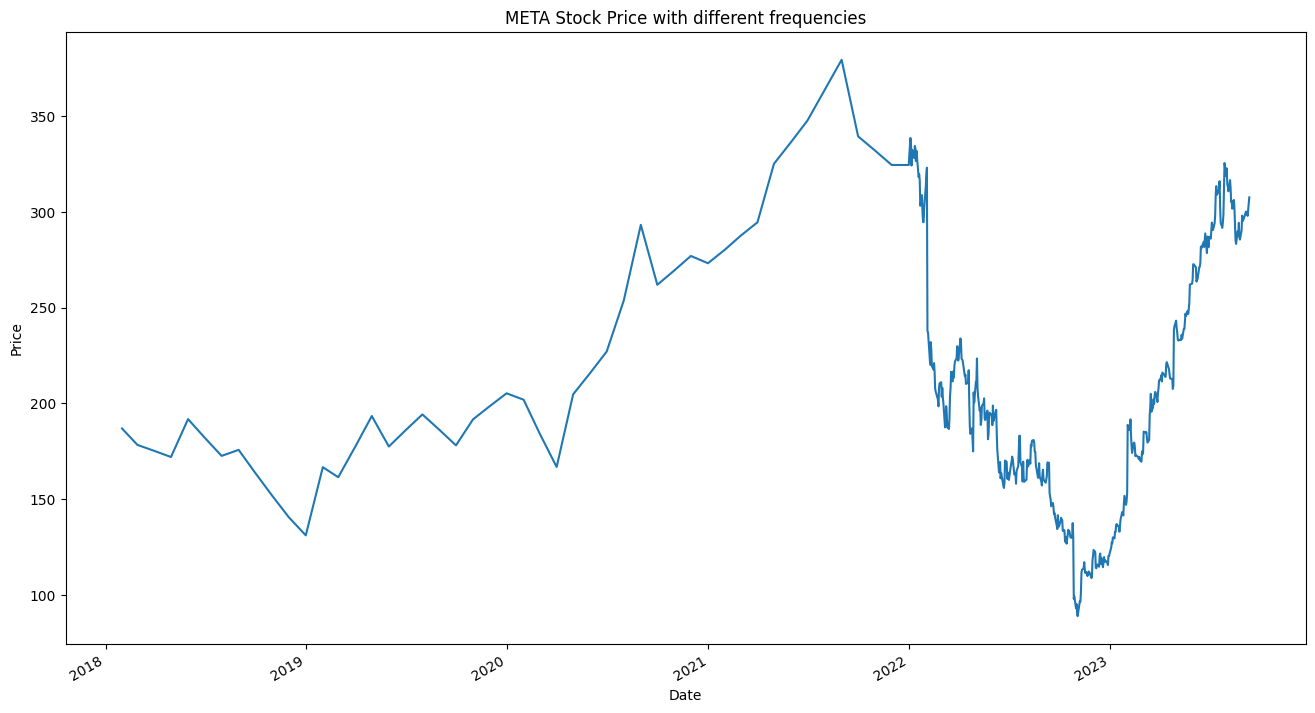

In [ ]:
combined_META_Stock.plot()
plt.title('META Stock Price with different frequencies')
plt.ylabel('Price')

From the series above we see that from the period between 2018 to 2021 the chart is smooth an indaction of low freqency and from 2022-2023 (daily prices) we can see that the chart has no much noise an indcation of high frequency.

## Diagnosis


The problem of joining time series with different frequencies can be recognized by the following symptoms:

- Missing data points
- Data points that are not aligned
- Spurious trends or patterns

## Damage

The problem of joining time series with different frequencies can cause the following damages:

- Incorrect results
- Inaccurate insights
- Misaligned data

## Directions

When dealing with time series of different frequencies:

- Resample: Convert both series to a common frequency before joining. This can be done using techniques like upsampling or downsampling. For example, df.resample('D').mean() can convert a monthly frequency dataframe to a daily frequency by taking the average value.
- Forward fill or Backward fill: Fill missing values by propagating the last valid observation (ffill) or using the next valid observation (bfill).
- Interpolation: Estimate missing values between known values.
Use a Multi-index: In pandas, create a multi-index dataframe where one level is the coarser frequency and the other level is the finer frequency.
- Statistical Models: Consider models like ARIMA or state-space models that can accommodate different frequencies.

## Unit Root Testing
###**Definition**

In [ ]:
path = 'AAPL.csv'
df = pdr.get_data_yahoo('AAPL', start='1980-01-01', end=endDate)
df['Date'] = df.index
df.head(5)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099450,469033600,1980-12-12
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094261,175884800,1980-12-15
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087343,105728000,1980-12-16
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089504,86441600,1980-12-17
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092099,73449600,1980-12-18


In [ ]:
df = df.loc[(df['Date']  >='2020-01-01')]


###Diagram

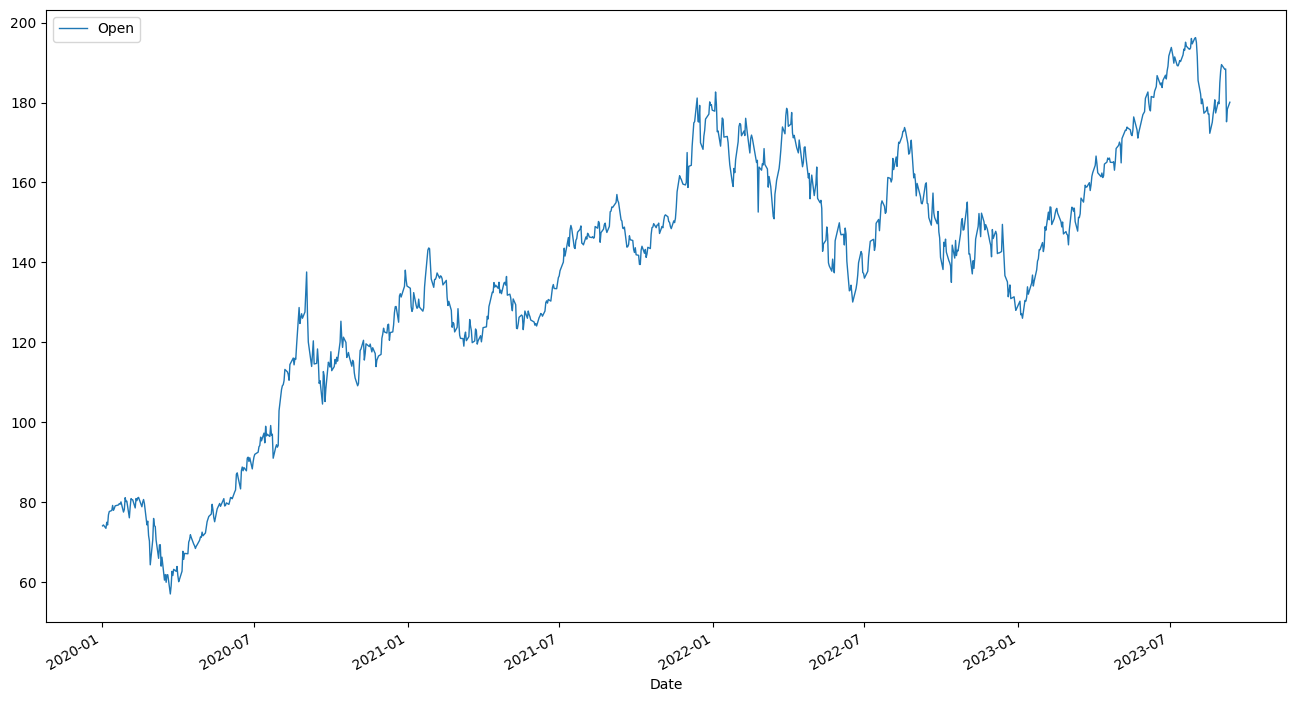

In [ ]:
df.plot(
    linewidth=1,
    x="Date",
    y="Open"
)
plt.show()

In [ ]:
df = df.set_index('Date')

###Diagnosis
There are two popular tests that we can perform to test if a time series is stationary. That is the Augmented Dickey Fuller Test (ADF) and Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test. ADF H0 states that there is a unit root in the time series, while KPSS H0 states that the time series is trend stationary.

In [ ]:
# ADF Test without Drift and Trend

adf_none = ADF(df['Open'], trend="n", method="bic")
print("\nTest statistics and critical values: \n", adf_none)


Test statistics and critical values: 
    Augmented Dickey-Fuller Results   
Test Statistic                  0.826
P-value                         0.889
Lags                                0
-------------------------------------

Trend: No Trend
Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [ ]:
# ADF test with drift but no trend
adf_drift = ADF(df['Open'], trend="c", method="bic")
print("\nTest statistics and critical values: \n", adf_drift)


Test statistics and critical values: 
    Augmented Dickey-Fuller Results   
Test Statistic                 -1.713
P-value                         0.425
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [ ]:
# ADF test with drift and trend
adf_trend = ADF(df['Open'], trend="ct", method="bic")
print("\nTest statistics and critical values: \n", adf_trend)


Test statistics and critical values: 
    Augmented Dickey-Fuller Results   
Test Statistic                 -1.535
P-value                         0.817
Lags                                0
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.97 (1%), -3.42 (5%), -3.13 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [ ]:
# KPSS test
# (Set lags=-1 to use the old method that only depends on the sample size)
print(KPSS(df['Open'], trend="ct", lags=-1))

    KPSS Stationarity Test Results   
Test Statistic                  0.280
P-value                         0.003
Lags                               19
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: 0.22 (1%), 0.15 (5%), 0.12 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


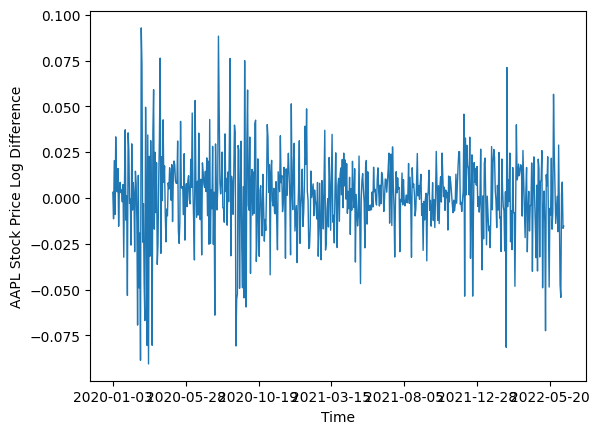

In [ ]:
lbtc = np.log(df['Open']).diff().dropna()
lbtc.plot(
    linewidth=1,
    xlabel="Time",
    ylabel="AAPL Stock Price Log Difference",
)
plt.show()

In [ ]:
# BTC Log Price, ADF Test without Drift and Trend
adf_none = ADF(lbtc, trend="n", method="bic")
print("\nTest statistics and critical values: \n", adf_none)


Test statistics and critical values: 
    Augmented Dickey-Fuller Results   
Test Statistic                -26.964
P-value                         0.000
Lags                                0
-------------------------------------

Trend: No Trend
Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


##Regime Change Model ####

##Demonstration:
To illustrate regime chang. The plot of the data shows that there are periods of high and low growth, as well as occasional negative growth, which may indicate different regimes in the data. We can use a Markov-switching model to identify and estimate these regimes. A Markov-switching model assumes that the regime indicator follows a Markov chain, which is a process that depends only on its previous state. A Markov-switching model can be written as:

$$Y_t = \mu_{S_t} + \sigma_{S_t} Z_t$$

where $Y_t$ is the TSLA Stock return , $\mu_{S_t}$ is the regime-dependent mean, $\sigma_{S_t}$ is the regime-dependent standard deviation, and $Z_t$ is a standard normal error term. The regime indicator $S_t$ can take two values, 1 or 2, corresponding to a low-growth regime or a high-growth regime. The transition probabilities between the regimes are given by:

$$P(S_t = i | S_{t-1} = j) = p_{ij}$$

where $i,j = 1,2$ and $p_{ij}$ are constants that sum to one for each row.
## Diagram:
The following figure shows the plot of the TSLA Return.

## Diagnosis:
To detect if we need a regime change model for a time series data, we can check the following aspects of the data:

•  The plot of the data: We can look for visual evidence of changes in the level, trend, volatility, or cyclicality of the data over time.

•  The summary statistics of the data: We can calculate the mean, variance, autocorrelation, skewness, kurtosis, or other statistics of the data and see if they vary across different sub-periods or segments of the data.

•  The formal tests of the data: We can use statistical tests to test for structural breaks, unit roots, stationarity, cointegration, or other properties of the data that may indicate regime changeshttps://www.frbsf.org/economic-research/wp-content/uploads/sites/4/wp2020-15.pdf

In [63]:
start = datetime.datetime(1947, 1, 1)
end = datetime.datetime(2020, 12, 31)
TSLA_stock = pdr.get_data_yahoo('TSLA', start=start, end=end)['Adj Close']
TSLA_ret = TSLA_stock.resample('W').last().pct_change().dropna()

[*********************100%%**********************]  1 of 1 completed


<Axes: title={'center': 'TSLA Excess Returns Time Series with Regime Change'}, xlabel='Date'>

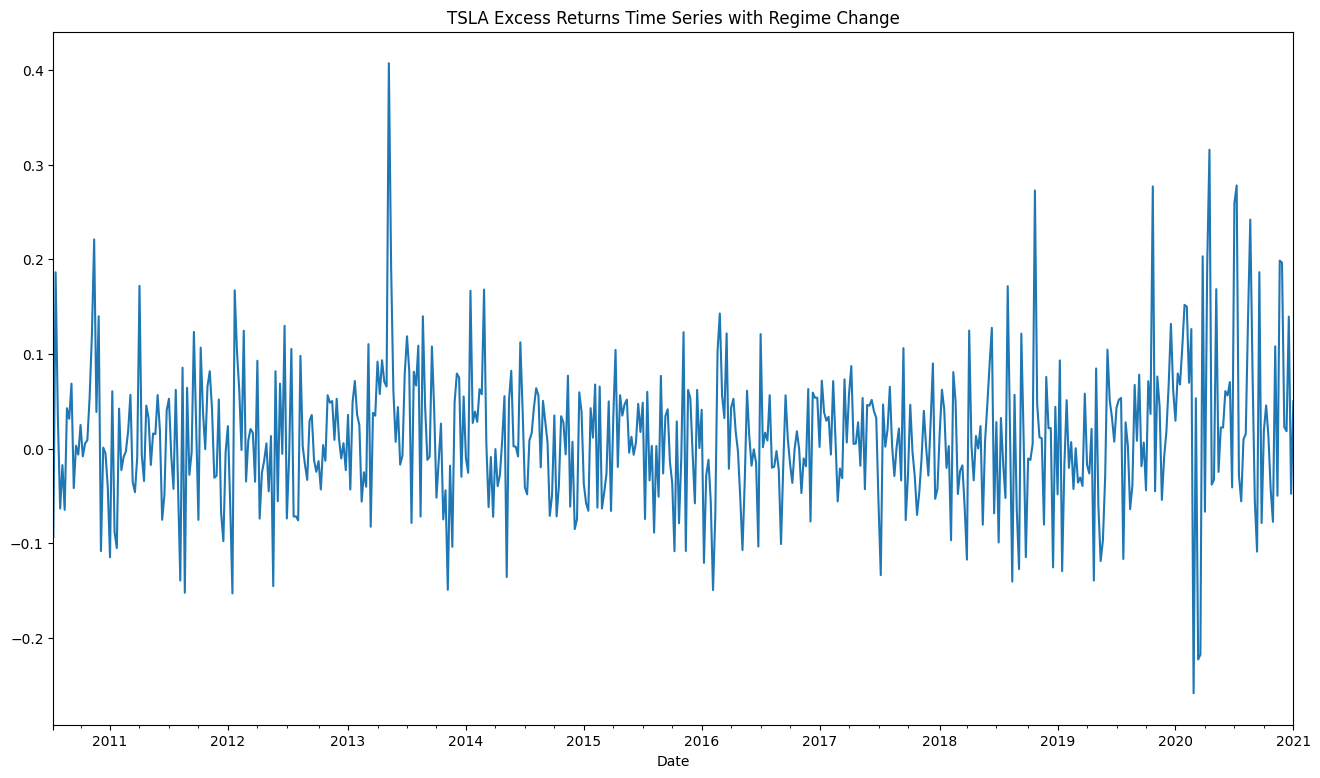

In [72]:
TSLA_ret_series = pd.Series(TSLA_ret)
TSLA_ret_series.plot(title='TSLA Excess Returns Time Series with Regime Change')
# plt.title('META Stock Price with different frequencies')
# plt.title('TSLA Excess Returns Time Series with Regime Change')

In [76]:
adfuller(TSLA_ret.dropna())

(-11.91911882113044,
 5.081370035712477e-22,
 2,
 545,
 {'1%': -3.442405720052601,
  '5%': -2.866857804790472,
  '10%': -2.5696022094099824},
 -1229.9954686350868)

## Multicollinearity

###Definition:
Multicollinearity is a statistical phenomenon that occurs when two or more independent variables in a regression model are highly correlated with each other. It indicates a strong linear relationship among predictor values.
###Description:
Multicollinearity makes it difficult to interpret the contribution of each variable to the model leading to unreliable coefficient estimates.

###Demonstration


In [ ]:


# Set a random seed for reproducibility
np.random.seed(0)

# Number of data points
n = 1000

# Generate independent variables
x1 = np.random.rand(n) * 10  # Random values between 0 and 10
x2 = 2 * x1 + np.random.normal(0, 1, n)  # x2 is highly correlated with x1
x3 = -3 * x1 + np.random.normal(0, 1, n)  # x3 is negatively correlated with x1
x4 = np.random.rand(n) * 5  # Another independent variable
x5 = np.random.rand(n) * 3  # Another independent variable
x6 = np.random.rand(n) * 4  # Another independent variable
x7 = np.random.rand(n) * 6  # Another independent variable
x8 = np.random.rand(n) * 7  # Another independent variable
x9 = np.random.rand(n) * 8  # Another independent variable
x10 = np.random.rand(n) * 9  # Another independent variable


# Generate a dependent variable
y = 3 * x1 + 2 * x2 - 2 * x3 + np.random.normal(0, 1, n)

# Create a DataFrame
data = pd.DataFrame({'X1': x1, 'X2': x2, 'X3': x3, 'X4': x4, 'X5': x5,
                     'X6': x6, 'X7': x7, 'X8': x8, 'X9': x9, 'X10': x10, 'Y': y})
# Display the first few rows of the dataset
print(data.head())



         X1         X2         X3        X4        X5        X6        X7  \
0  5.488135  10.874573 -15.463074  1.624861  0.755141  2.311885  3.817293   
1  7.151894  14.323067 -20.858468  1.702938  1.558407  2.892372  0.217826   
2  6.027634  13.904859 -18.898177  3.481838  0.749313  3.232531  4.904508   
3  5.448832  10.683497 -14.545281  1.201311  0.722007  3.725128  2.259836   
4  4.236548   7.974079 -12.494404  1.626632  0.387424  1.159961  2.393608   

         X8        X9       X10          Y  
0  3.702528  2.210284  7.615437  69.400422  
1  2.133578  1.669878  3.641126  94.021049  
2  3.117893  0.827099  2.307373  82.920156  
3  5.419859  6.412605  8.016280  66.807426  
4  4.677076  5.605479  3.356598  53.529284  


###Diagram:
A visual correlation heatmap plot showing the effect of multicollinearity is shown below with the help of the simulated data in the demonstration above.

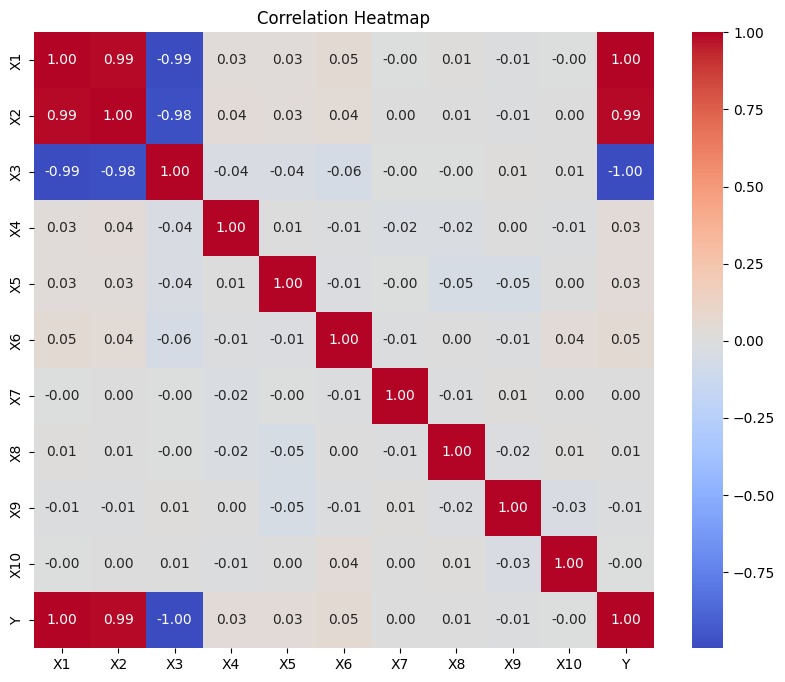

   Variable       VIF
0     const  0.959697
1        X1  0.991583
2        X2  0.973034
3        X3  0.988223
4        X4  0.006672
5        X5  0.007929
6        X6  0.008649
7        X7  0.002237
8        X8  0.005601
9        X9  0.003929
10      X10  0.004492


In [ ]:
# Display the correlation heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Perform multicollinearity diagnosis using Variance Inflation Factor (VIF)
X = data[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10']]
X = sm.add_constant(X)  # Add a constant term for the intercept
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [sm.OLS(X[col], X.drop(columns=[col])).fit().rsquared for col in X.columns]
print(vif)

###Diagnosis:  
There are several options to test for the presence of multicollinearity
1.	Using the correlation matrix to see which of the independent variables are linearly correlated to each other.
2.	Using the Variance Inflation Factor (VIF): This is the measure of the amount of multicollinearity.  VIF tells us the factor by which the correlations amongst the predictors inflate the variance. For example, a VIF of 10 indicates that the existing multicollinearity is inflating the variance of the coefficients 10 times compared to a no multicollinearity model. VIFs do not have any upper limit. The lower the value the better. Values of more than 4 or 5 are sometimes regarded as being moderate to high, with values of 10 or more being regarded as very high. Therefore a VIF = 5 is often taken as a threshold. This means that any independent variable greater than 5 will have to be removed. Although the ideal threshold value depends upon the case. In many econometric textbooks, you will find that multicollinearity is considered to be severe only when VIF >10.
###Damage:  
Multicollinearity can lead to unstable and inaccurate coefficient estimates, making it hard to identify the true predictors in a model. In the presence of multicollinearity, the estimated regression coefficients become large and unpredictable, which leads to unreliable inferences about the effects of the predictor variables on the response variable.
###Direction:
Some of the methods to arrest the issue of multicollinearity include dropping the independent variable that has a high correlation, using the VIF is a more effective way to tackle the multicollinearity issue. Another effective way is to use the PCA (principal component analysis) and Ridge regression.
